# Proyek Analisis Data: E-Commerce Public
- **Nama:** Muhammad Zawawi Basri
- **Email:** zawawibasri@gmail.com
- **ID Dicoding:** MC262D5Y2274

## Menentukan Pertanyaan Bisnis

- Wilayah mana yang paling banyak menggunakan e-commerce
- Wilayah mana yang paling sedikit menggunakan e-commerce

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium


## Data Wrangling

### Gathering Data

In [2]:
customers = pd.read_csv("data/customers_dataset.csv")
geolocation = pd.read_csv("data/geolocation_dataset.csv")
order_items = pd.read_csv("data/order_items_dataset.csv")
order_payments = pd.read_csv("data/order_payments_dataset.csv")
order_reviews = pd.read_csv("data/order_reviews_dataset.csv")
orders = pd.read_csv("data/orders_dataset.csv")
product_category = pd.read_csv("data/product_category_name_translation.csv")
products = pd.read_csv("data/products_dataset.csv")
sellers = pd.read_csv("data/sellers_dataset.csv")


**Insight:**
- Data set memiliki 9 file .csv

### Assessing Data

In [3]:
datasets = [customers, geolocation, order_items, order_payments, order_reviews, orders, product_category, products, sellers]

dataset_names = ["customers", "geolocation", "order_items", "order_payments", "order_reviews", "orders", "product_category_translation", "products", "sellers"]

for name, data in zip(dataset_names, datasets):
    print(f"\n--- {name} ---")
    print(data.info())
    print(data.head())




--- customers ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

 

**Insight:**
- Ada banyak missing value pada "order_review", mungkin karena tidak semua pelanggan memberikan review komentar
- Ada beberapa missing value juga di "orders", mungkin karena ada pesanan yang dibatalkan (mungkin?)

### Cleaning Data

In [4]:
import pandas as pd

orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"], errors="coerce")
orders.to_csv("orders_dataset_cleaned.csv", index=False)

geolocation = pd.read_csv("data/geolocation_dataset.csv")
geolocation.ffill(inplace=True)
geolocation.to_csv("data/geolocation_cleaned.csv", index=False)

print("Missing values sebelum cleaning:\n", geolocation.isnull().sum())
print("Missing values setelah cleaning:\n", geolocation.isnull().sum())

Missing values sebelum cleaning:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Missing values setelah cleaning:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


**Insight:**
- Masih ada data yang perlu diubah tipe datanya seperti penanggalan waktu
- Semua kolom memiliki nilai yang lengkap (jos!)

## Exploratory Data Analysis (EDA)

### Explore frekuensi pembelian

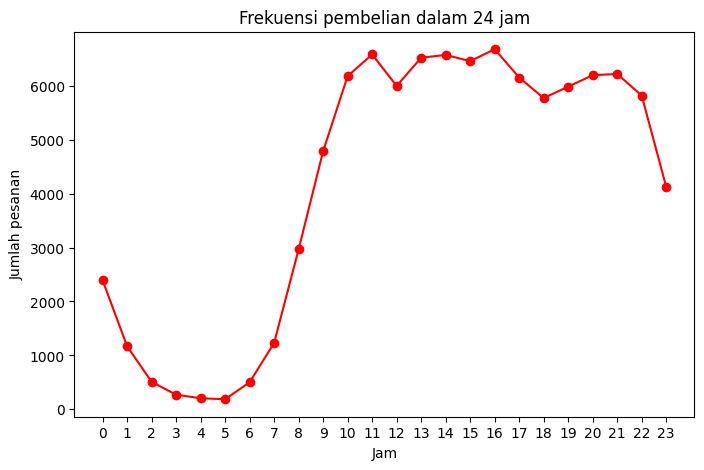

In [5]:
orders["hour"] = orders["order_purchase_timestamp"].dt.hour

order_counts_hour = orders["hour"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
order_counts_hour.plot(kind="line", marker="o", color="red", linestyle="-")

plt.xlabel("Jam")
plt.ylabel("Jumlah pesanan")
plt.title("Frekuensi pembelian dalam 24 jam")
plt.xticks(range(0, 24))

plt.show()



**Insight:**
- Pembelian terendah ada pada jam 5 pagi
- Pembelian tertinggi ada pada jam 4 sore

## Visualization & Explanatory Analysis

### Wilayah mana yang paling banyak menggunakan e-commerce:

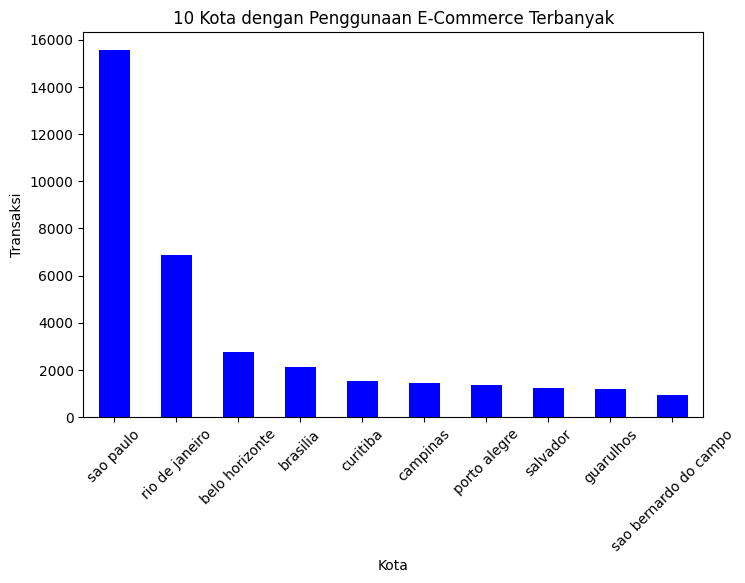

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

customers = pd.read_csv("data/customers_dataset.csv")
orders = pd.read_csv("data/orders_dataset.csv")

order_city = orders.merge(customers, on="customer_id", how="left")

city_counts = order_city["customer_city"].value_counts().head(10)

plt.figure(figsize=(8, 5))
city_counts.plot(kind="bar", color="blue")
plt.xlabel("Kota")
plt.ylabel("Transaksi")
plt.title("10 Kota dengan Penggunaan E-Commerce Terbanyak")
plt.xticks(rotation=45)
plt.show()


**Insight:**
- Kota dengan pengguna terbanyak adalah sao paolo

### Wilayah mana yang paling sedikit menggunakan e-commerce:

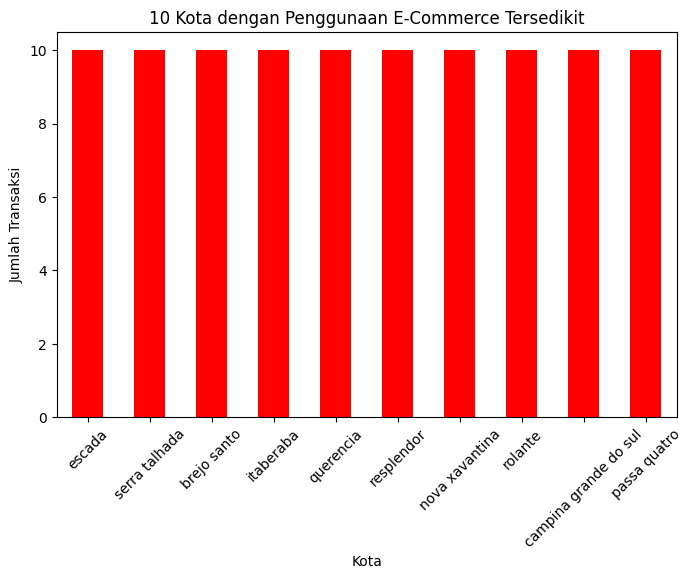

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

customers = pd.read_csv("data/customers_dataset.csv")
orders = pd.read_csv("data/orders_dataset.csv")

merged_df = orders.merge(customers, on="customer_id", how="left")

city_counts = merged_df["customer_city"].value_counts()

low_usage_cities = city_counts[city_counts >= 10].tail(10)

plt.figure(figsize=(8, 5))
low_usage_cities.plot(kind="bar", color="red")
plt.xlabel("Kota")
plt.ylabel("Jumlah Transaksi")
plt.title("10 Kota dengan Penggunaan E-Commerce Tersedikit")
plt.xticks(rotation=45)
plt.show()


**Insight:**
- Menarik! terlihat ada 10 kota dengan pengguna ecommerce terendah dan masing masing memiliki 1 pengguna (10=1, 8=0.8, 6=0.6, dst.)

## Analisis Lanjutan (Opsional)

### Geospatial penggunaan e-commerce (dibatasi 10000 data, device gakuat hehe)

In [8]:
import pandas as pd
import folium
from folium.plugins import HeatMap

orders = pd.read_csv("data/orders_dataset.csv")
customers = pd.read_csv("data/customers_dataset.csv")
geolocation = pd.read_csv("data/geolocation_dataset.csv")

order_customer = orders.merge(customers, on="customer_id", how="inner")

geo_data = order_customer.merge(geolocation, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="left")

geo_data_sample = geo_data.sample(n=10000, random_state=42)

order_counts = geo_data_sample.groupby(["geolocation_lat", "geolocation_lng"]).size().reset_index(name="order_count")

m = folium.Map(location=[-23.5505, -46.6333], zoom_start=5)

heat_data = [[row["geolocation_lat"], row["geolocation_lng"], row["order_count"]] for _, row in order_counts.iterrows()]
HeatMap(heat_data, radius=10).add_to(m)
m


## Conclusion

**Pertanyaan 1:**
- Kota dengan pengguna e-commerce terbanyak adalah sao paolo

**Pertanyaan 2:**
- Ada 10 kota yang memiliki pengguna terendah (bisa lebih banyak) yang ditampilkan dengan total pengguna yang sama yaitu 10